In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
import json

file_path = r'C:\Users\admin\OneDrive\Desktop\Loan approval data set/loan_approval_dataset.json'

# Open and read the JSON file
with open(file_path, 'r') as f:
    data = json.load(f)

# Display the data to ensure it has been read correctly
print(data)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
loan=pd.DataFrame(data)

In [4]:
loan.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [6]:
print("The Rows is ---> ",loan.shape[0])
print("The Columns is ---->", loan.shape[1])

The Rows is --->  252000
The Columns is ----> 13


In [7]:
loan.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


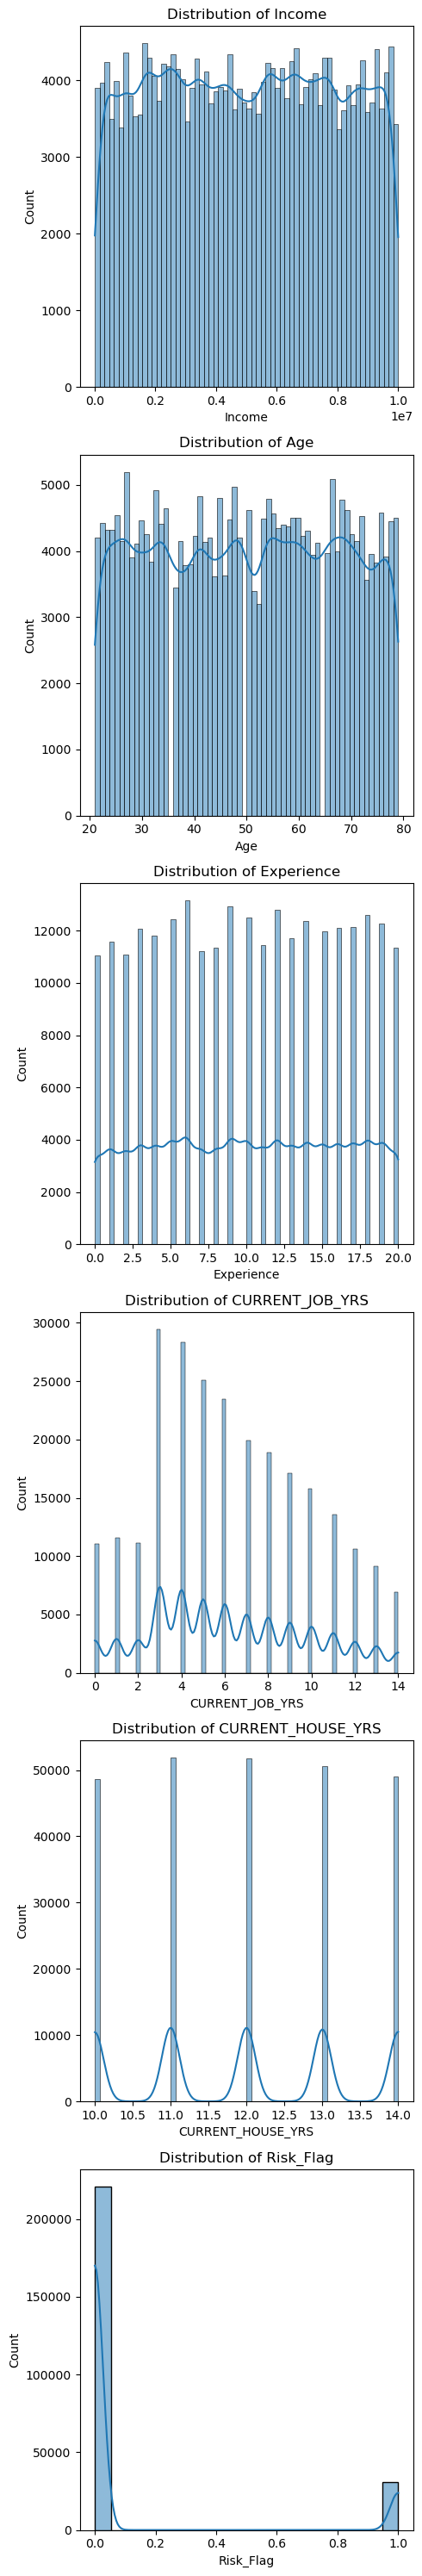

In [8]:
#Checking the Distribution of the columns
import matplotlib.pyplot as plt
import seaborn as sns

# List of all columns you want to check distribution for
columns = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

fig, axs = plt.subplots(len(columns), figsize=(5, 5*len(columns)))

for i, col in enumerate(columns):
    sns.histplot(loan[col], ax=axs[i],kde=True)
    axs[i].set_title('Distribution of ' + col)

plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_13948\2079203309.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan.corr(),annot=True,cmap='coolwarm')


<Axes: >

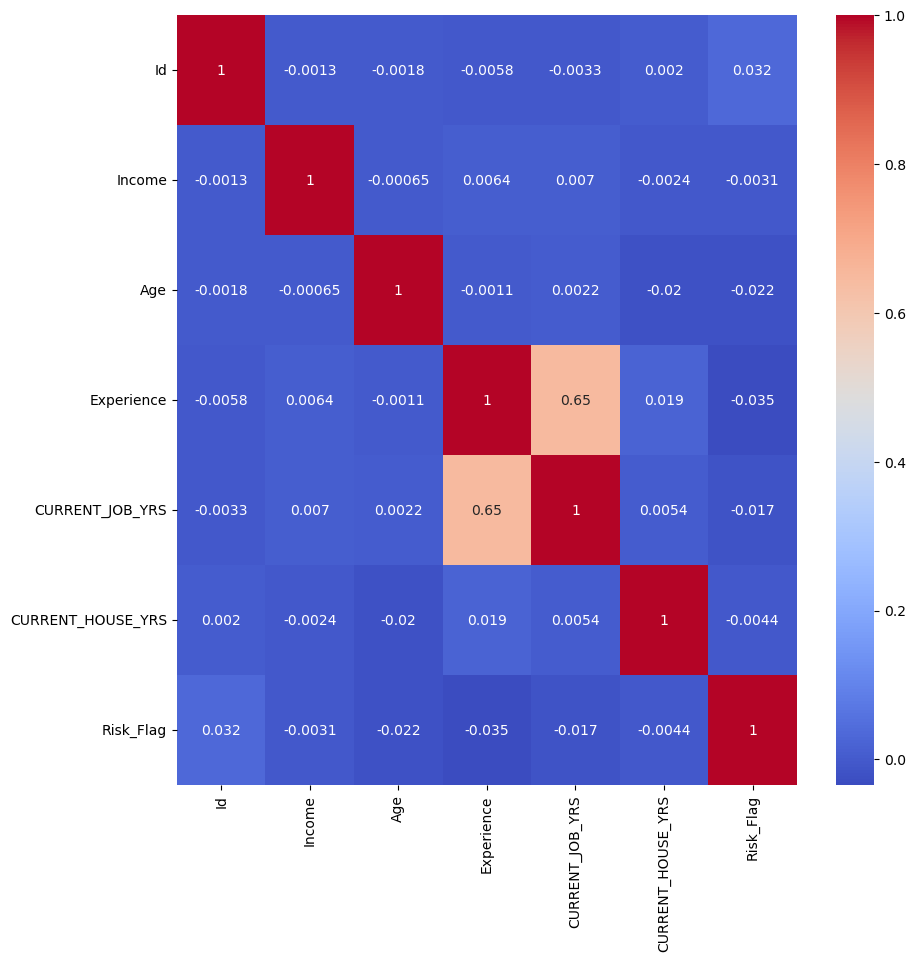

In [9]:
#Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(loan.corr(),annot=True,cmap='coolwarm')

In [10]:
loan.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [11]:
loan=loan.drop(['Id','CITY','STATE'],axis=1)

In [12]:
loan.rename(columns={'Married/Single':'Marriage_status'},inplace=True)

In [13]:
[loan.select_dtypes(include='object').columns]

[Index(['Marriage_status', 'House_Ownership', 'Car_Ownership', 'Profession'], dtype='object')]

In [14]:
loan.Profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

loan.Marriage_status.replace({'single':0, 'married':1},inplace=True)
loan.House_Ownership.replace({'rented':2, 'norent_noown':1, 'owned':3},inplace=True)
loan.Car_Ownership.replace({'no':0, 'yes':1},inplace=True)
loan.Profession=le.fit_transform(loan.Profession)

In [16]:
loan.head().columns

Index(['Income', 'Age', 'Experience', 'Marriage_status', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS',
       'Risk_Flag'],
      dtype='object')

In [19]:
from sklearn.model_selection import train_test_split
loan_train,loan_test=train_test_split(loan,test_size=.2)

In [20]:
loan_train, loan_test = train_test_split(loan, test_size=0.2, random_state=42)

In [21]:
loan_train_x = loan_train.drop(columns=['Risk_Flag'],axis=1)
loan_train_y = loan_train['Risk_Flag']
loan_test_x = loan_test.drop(columns=['Risk_Flag'],axis=1)
loan_test_y = loan_test['Risk_Flag']

In [25]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [26]:
logreg.fit(loan_train_x,loan_train_y)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
pred=logreg.predict(loan_test_x)

In [28]:
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report
confusion_matrix(loan_test_y,pred)

array([[44147,     0],
       [ 6253,     0]], dtype=int64)

In [29]:
accuracy_score(loan_test_y,pred)

0.8759325396825397

In [30]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion='entropy')

In [31]:
dec.fit(loan_train_x,loan_train_y)

DecisionTreeClassifier(criterion='entropy')

In [32]:
dec_pred=dec.predict(loan_test_x)

In [33]:
confusion_matrix(loan_test_y,dec_pred)

array([[40884,  3263],
       [ 2670,  3583]], dtype=int64)

In [34]:
accuracy_score(loan_test_y,dec_pred)

0.882281746031746

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfm=RandomForestClassifier()

In [36]:
rfm.fit(loan_train_x,loan_train_y)

RandomForestClassifier()

In [37]:
rfm_pred=rfm.predict(loan_test_x)

In [38]:
confusion_matrix(loan_test_y,rfm_pred)

array([[41943,  2204],
       [ 2908,  3345]], dtype=int64)

In [39]:
accuracy_score(loan_test_y,rfm_pred)

0.8985714285714286

In [40]:
# from sklearn.model_selection import GridSearchCV

# search_dict = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7]
# }

# rfc = RandomForestClassifier()
# grid_search = GridSearchCV(rfc, param_grid=search_dict)
# grid_search.fit(loan_train_x, loan_train_y)
# grid_search.best_params_

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(
 max_depth = 7,
 n_estimators= 200,random_state=42)

In [42]:
rfc.fit(loan_train_x,loan_train_y)

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [43]:
rfc_pred=rfc.predict(loan_test_x)

In [44]:
confusion_matrix(loan_test_y,rfc_pred)

array([[44143,     4],
       [ 6239,    14]], dtype=int64)

In [45]:
accuracy_score(loan_test_y,rfc_pred)

0.8761309523809524

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.7, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent

In [50]:
model = GradientBoostingClassifier(random_state=10,loss="log_loss",criterion="squared_error")

gscv_GBM = GridSearchCV(estimator=model,
                    param_grid=model_parameters,  # comibnation = 4
                    cv=10,  # K-fold = 10 or 5
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(loan_train_x, loan_train_y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.7, 0.6], 'max_depth': [2, 3],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [51]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.7, 'max_depth': 3, 'min_samples_leaf': 200, 'min_samples_split': 50, 'n_estimators': 5}


In [52]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(loan_train_x, loan_train_y)

GradientBoostingClassifier(learning_rate=0.7, min_samples_leaf=200,
                           min_samples_split=50, n_estimators=5)

In [57]:
# Prediction
train_pred = final_mod_GBM.predict(loan_train_x)
test_pred = final_mod_GBM.predict(loan_test_x)

In [58]:
print('Classification report for train data is : \n',
      classification_report(loan_train_y, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93    176857
           1       0.86      0.00      0.00     24743

    accuracy                           0.88    201600
   macro avg       0.87      0.50      0.47    201600
weighted avg       0.88      0.88      0.82    201600



In [59]:
print('Classification report for test data is : \n',
      classification_report(loan_test_y, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     44147
           1       0.79      0.00      0.00      6253

    accuracy                           0.88     50400
   macro avg       0.83      0.50      0.47     50400
weighted avg       0.87      0.88      0.82     50400



In [60]:
from xgboost.sklearn import XGBClassifier

In [61]:
xg_model_parameters = {'n_estimators': [10, 50], # number of tress
                    'max_depth':    [3, 5],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'reg_lambda':[0,1]} #parent

In [62]:
# Gridsearch the parameters to find the best parameters. Using L2 penalty
model = XGBClassifier()   # Lamda = 0
gscv = GridSearchCV(estimator=model,
                    param_grid=xg_model_parameters,
                    cv=10,
                    verbose=1,
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(loan_train_x, loan_train_y)  ## Model building

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [3, 5],
                         'n_estimators': [10, 50], 'reg_lambda': [0, 1]},
             scoring='accuracy', verbose=1)

In [63]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 50, 'reg_lambda': 1}


In [64]:
# Re-fit the model with the best parameters
final_mod = XGBClassifier(**gscv.best_params_)
final_mod.fit(loan_train_x, loan_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
final_pred_test=final_mod.predict(loan_test_x)

In [67]:
print('Classification report for test data is : \n',
      classification_report(loan_test_y, final_pred_test))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     44147
           1       0.61      0.20      0.30      6253

    accuracy                           0.88     50400
   macro avg       0.75      0.59      0.62     50400
weighted avg       0.86      0.88      0.86     50400



In [68]:
accuracy_score(loan_test_y, final_pred_test)

0.8848809523809524

# Conclusin

After trying out various ensembling algorithm like Random Forest Classifier I have got accuracy score of 89.85 %